In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

sys.path.append('..')
from env_config import DATA_PATH
from utils import get_column_desc
from data import COLUMNS_KIDS_ALL, COLUMNS_SDSS, FEATURES, process_kids, process_bitmaps
from plotting import plot_embedding

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100
sns.set(style='ticks')

pd.options.mode.chained_assignment = None

In [4]:
# to consider:
# mag vs error with SG2DPHOT or CLASS_STAR as dot size
# other plots: consider dot size, color, density, on standalone plots

## Read data
### KiDS x SDSS

In [4]:
kids_x_sdss = process_kids(os.path.join(DATA_PATH, 'KiDS/DR4/KiDS.DR4.x.SDSS.DR14.fits'), kids_cleaning=True,
                           sdss_cleaning=True, columns=COLUMNS_KIDS_ALL+COLUMNS_SDSS)

Data shape: (152244, 49)
Droping NANs: 130777 (85.90%) left
Cleaning SDSS: 122964 left


In [5]:
kids = process_kids(os.path.join(DATA_PATH, 'KiDS/DR4/KiDS.DR4.500k.fits'), kids_cleaning=True, sdss_cleaning=False,
                    columns=COLUMNS_KIDS_ALL)

Data shape: (501754, 44)
Droping NANs: 226903 (45.22%) left


In [34]:
kids_cs = kids.loc[(kids['CLASS_STAR'] > 0.8) | (kids['CLASS_STAR'] < 0.2)]

In [12]:
print(get_column_desc(kids_x_sdss['CLASS']))

GALAXY - 84728 (68.90%)
QSO - 13611 (11.07%)
STAR - 24625 (20.03%)


# Distributions

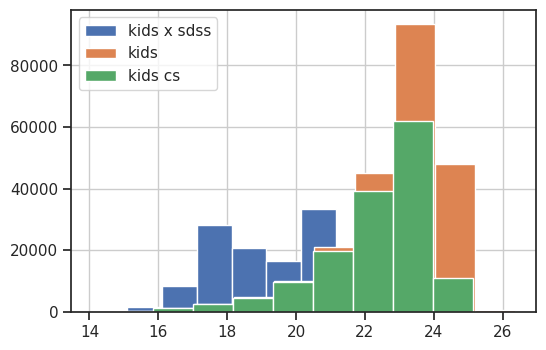

In [35]:
kids_x_sdss['MAG_GAAP_r'].hist(label='kids x sdss')
kids['MAG_GAAP_r'].hist(label='kids')
kids_cs['MAG_GAAP_r'].hist(label='kids cs')
plt.legend()

## Errors

In [36]:
cols_of_interest = [
    'MAG_GAAP_r',
    'MAGERR_GAAP_r',
]

In [14]:
kids_x_sdss[cols_of_interest].describe()

,MAG_GAAP_r,MAGERR_GAAP_r
count,122964.000000,122964.000000
mean,19.270208,0.005486
std,1.573790,0.006267
min,14.090182,0.000030
25%,17.937232,0.000964
50%,19.294328,0.002773
75%,20.738254,0.008810
max,24.190691,0.136557


In [37]:
kids_cs[cols_of_interest].describe()

,MAG_GAAP_r,MAGERR_GAAP_r
count,149911.000000,149911.000000
mean,22.343960,0.054121
std,1.557202,0.044833
min,14.698381,0.000048
25%,21.638430,0.017144
50%,22.765362,0.045320
75%,23.451499,0.081175
max,26.290426,0.900781


In [10]:
kids[cols_of_interest].describe()

,MAG_GAAP_r,MAGERR_GAAP_r
count,226903.000000,226903.000000
mean,22.887629,0.085850
std,1.530509,0.070249
min,14.698381,0.000048
25%,22.246992,0.028955
50%,23.303761,0.072236
75%,23.949010,0.127257
max,26.369030,1.052977


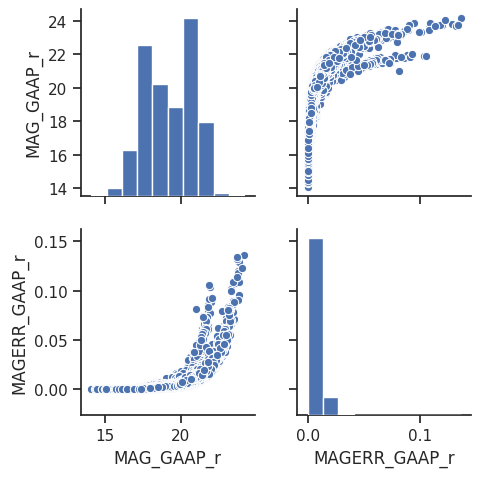

In [11]:
sns.pairplot(kids_x_sdss[cols_of_interest])

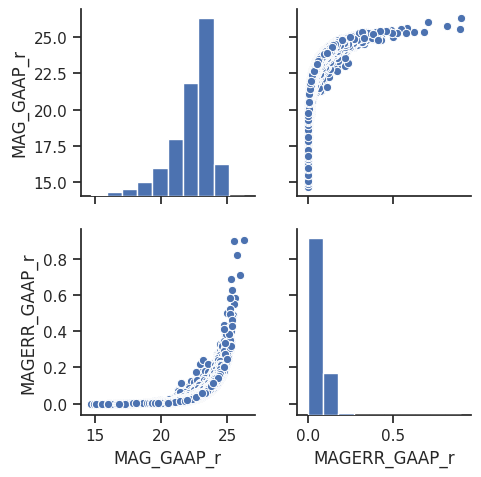

In [38]:
sns.pairplot(kids_cs[cols_of_interest])

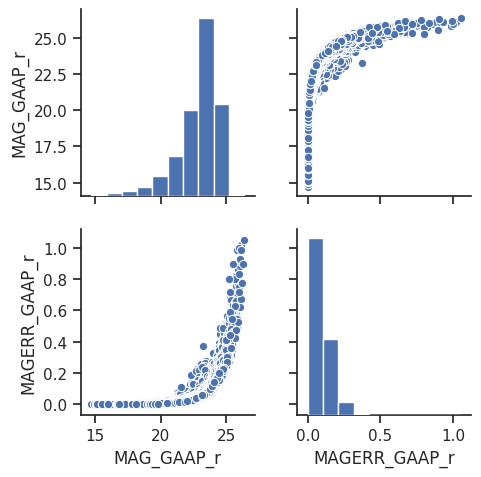

In [12]:
sns.pairplot(kids[cols_of_interest])

## Point classifiers

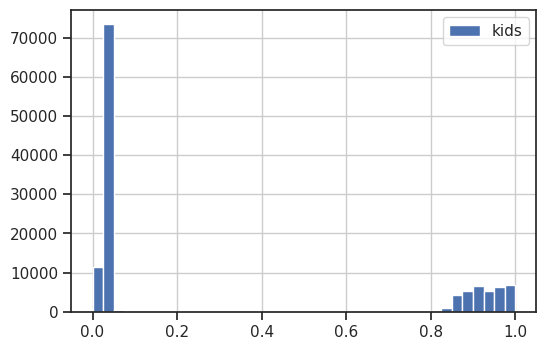

In [33]:
kids_x_sdss['CLASS_STAR'].hist(bins=40, label='kids')
plt.legend()

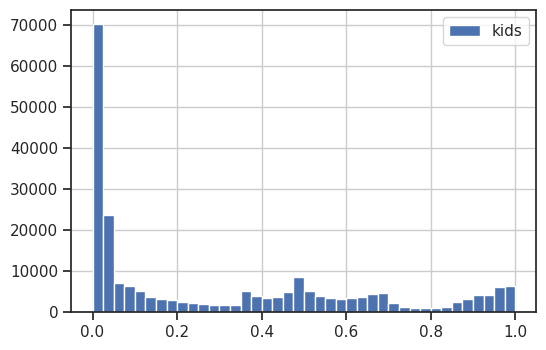

In [32]:
kids['CLASS_STAR'].hist(bins=40, label='kids')
plt.legend()

In [39]:
cols_of_interest = ['MAG_GAAP_r', 'MAGERR_GAAP_r', 'CLASS_STAR', 'SG2DPHOT_1', 'SG2DPHOT_2', 'SG2DPHOT_3']

In [14]:
kids_x_sdss[cols_of_interest].describe()

,MAG_GAAP_r,MAGERR_GAAP_r,CLASS_STAR,SG2DPHOT_1,SG2DPHOT_2,SG2DPHOT_3
count,122964.000000,122964.000000,122964.000000,122964.000000,122964.0,122964.000000
mean,19.270208,0.005486,0.294739,0.189999,0.0,0.275373
std,1.573790,0.006267,0.409533,0.392301,0.0,0.446704
min,14.090182,0.000030,0.000116,0.000000,0.0,0.000000
25%,17.937232,0.000964,0.028582,0.000000,0.0,0.000000
50%,19.294328,0.002773,0.028639,0.000000,0.0,0.000000
75%,20.738254,0.008810,0.872600,0.000000,0.0,1.000000
max,24.190691,0.136557,0.999906,1.000000,0.0,1.000000


In [40]:
kids_cs[cols_of_interest].describe()

,MAG_GAAP_r,MAGERR_GAAP_r,CLASS_STAR,SG2DPHOT_1,SG2DPHOT_2,SG2DPHOT_3
count,149911.000000,149911.000000,149911.000000,149911.000000,149911.0,149911.000000
mean,22.343960,0.054121,0.203696,0.076619,0.0,0.163163
std,1.557202,0.044833,0.352322,0.265987,0.0,0.369516
min,14.698381,0.000048,0.000045,0.000000,0.0,0.000000
25%,21.638430,0.017144,0.005238,0.000000,0.0,0.000000
50%,22.765362,0.045320,0.027652,0.000000,0.0,0.000000
75%,23.451499,0.081175,0.126759,0.000000,0.0,0.000000
max,26.290426,0.900781,0.999889,1.000000,0.0,1.000000


In [15]:
kids[cols_of_interest].describe()

,MAG_GAAP_r,MAGERR_GAAP_r,CLASS_STAR,SG2DPHOT_1,SG2DPHOT_2,SG2DPHOT_3
count,226903.000000,226903.000000,226903.000000,226903.000000,226903.0,226903.000000
mean,22.887629,0.085850,0.303379,0.050652,0.0,0.107857
std,1.530509,0.070249,0.328891,0.219286,0.0,0.310200
min,14.698381,0.000048,0.000045,0.000000,0.0,0.000000
25%,22.246992,0.028955,0.014877,0.000000,0.0,0.000000
50%,23.303761,0.072236,0.133166,0.000000,0.0,0.000000
75%,23.949010,0.127257,0.542808,0.000000,0.0,0.000000
max,26.369030,1.052977,0.999889,1.000000,0.0,1.000000


In [41]:
cols_of_interest = ['MAG_GAAP_r', 'MAGERR_GAAP_r', 'CLASS_STAR', 'SG2DPHOT_3']

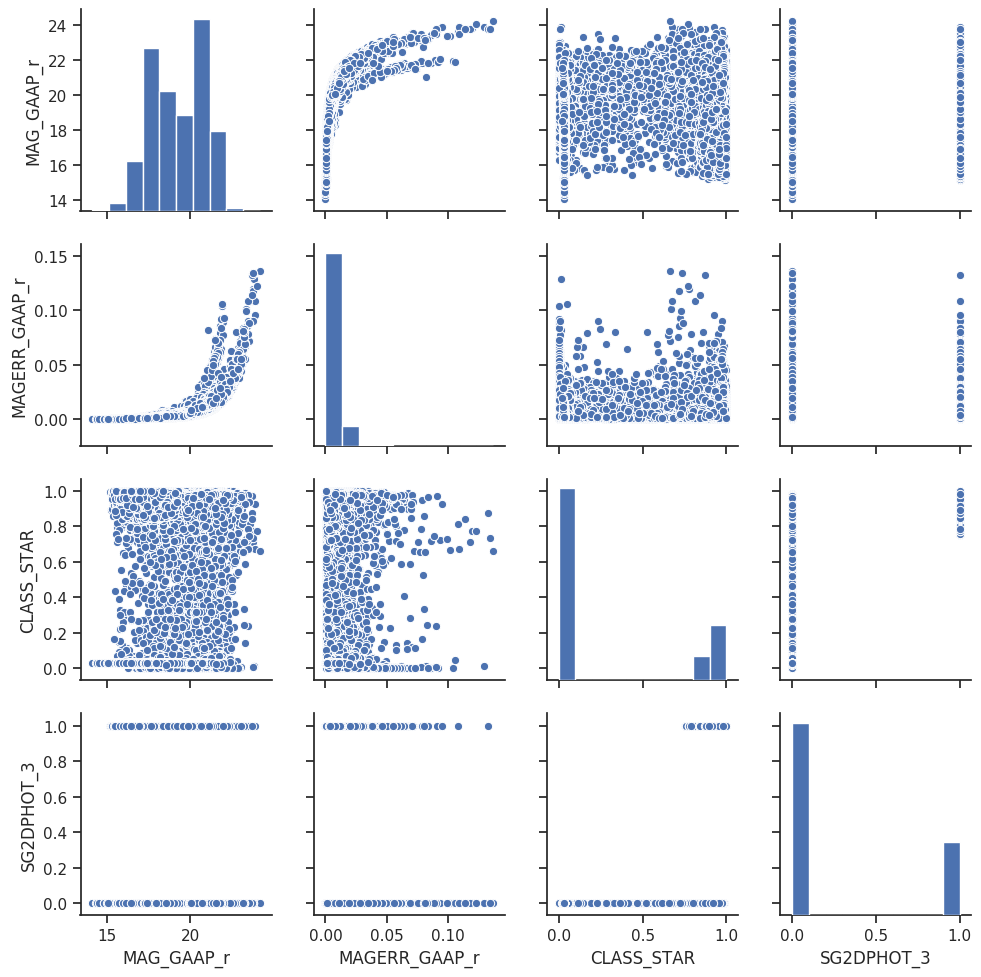

In [17]:
sns.pairplot(kids_x_sdss[cols_of_interest])

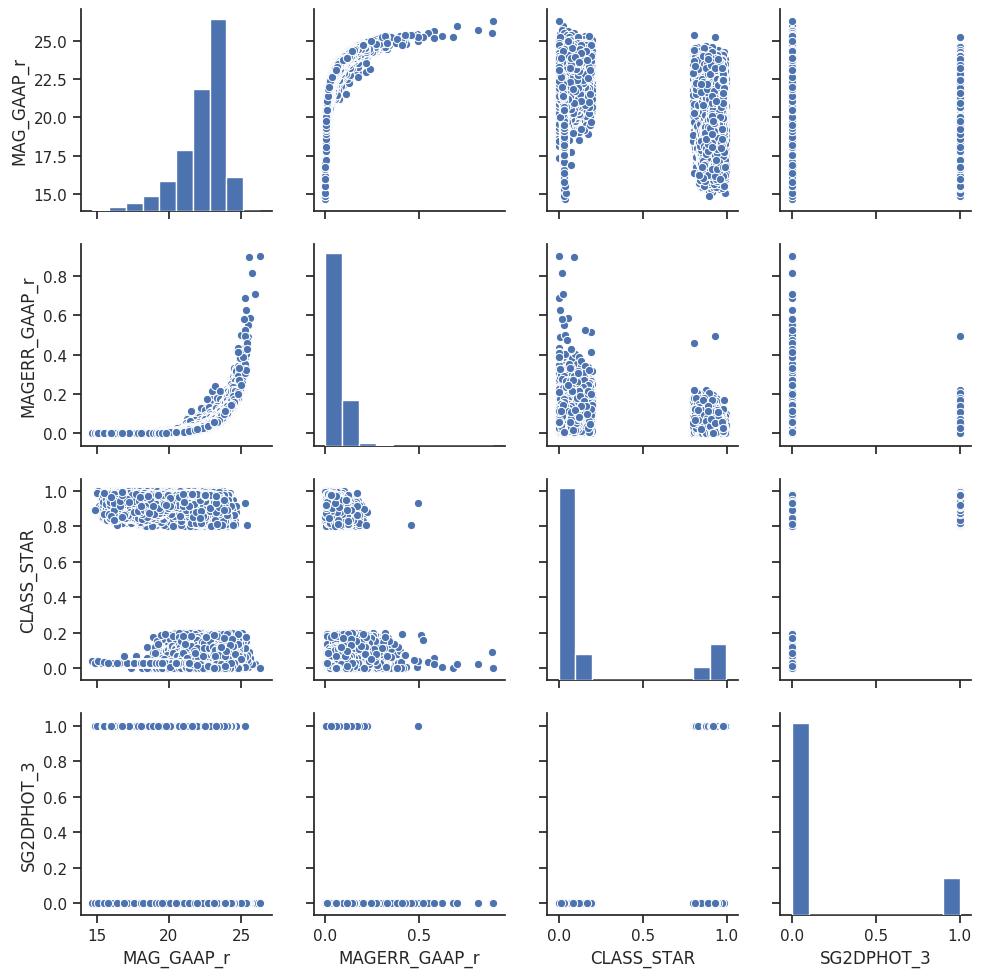

In [42]:
sns.pairplot(kids_cs[cols_of_interest])

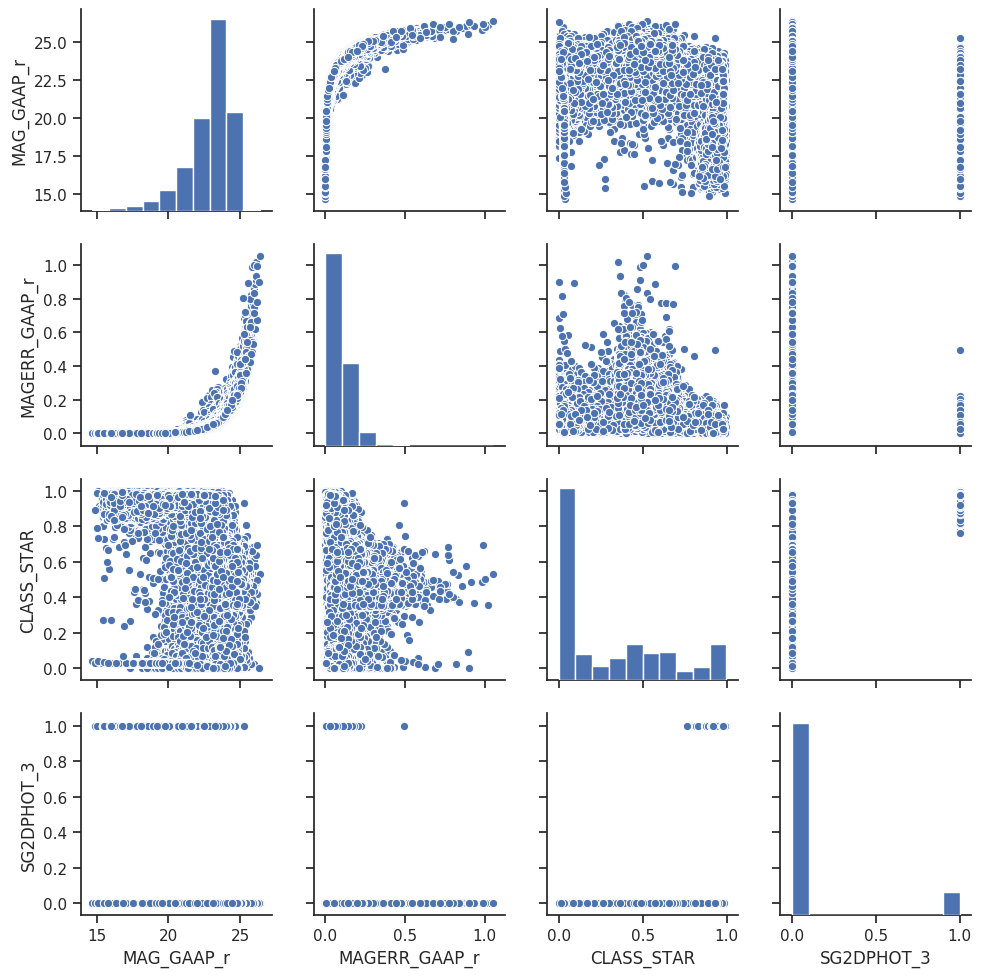

In [18]:
sns.pairplot(kids[cols_of_interest])

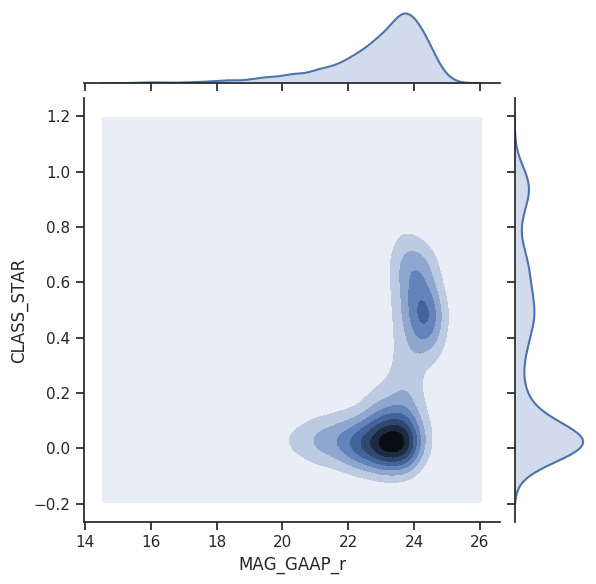

In [19]:
sns.jointplot(x='MAG_GAAP_r', y='CLASS_STAR', data=kids.sample(4000), kind='kde')

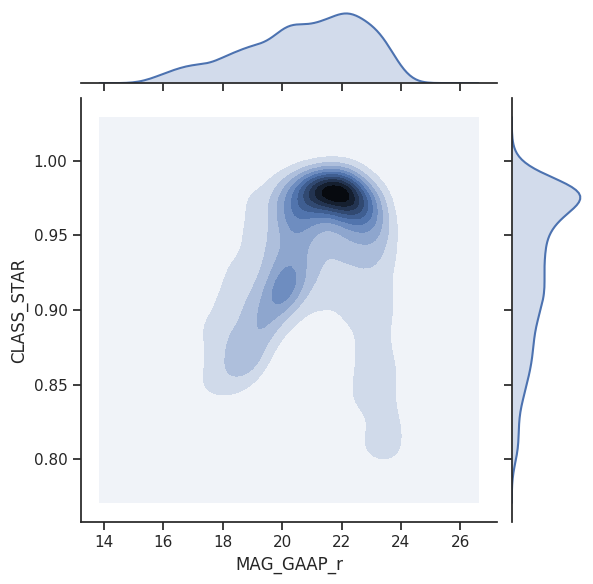

In [20]:
sns.jointplot(x='MAG_GAAP_r', y='CLASS_STAR', data=kids.loc[kids['CLASS_STAR'] > 0.8].sample(4000), kind='kde')

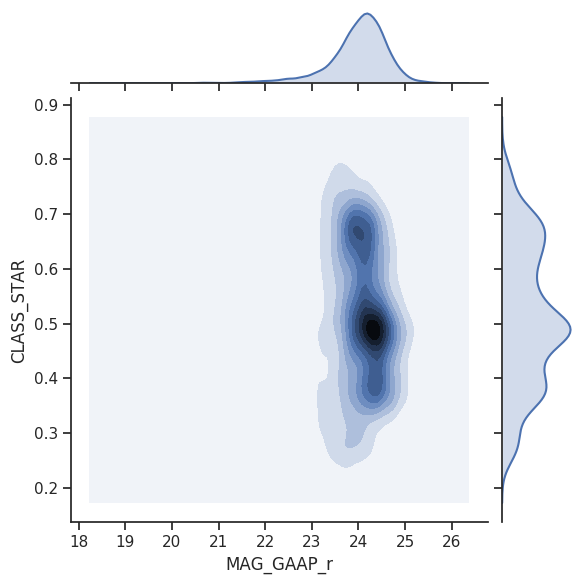

In [21]:
sns.jointplot(x='MAG_GAAP_r', y='CLASS_STAR', data=kids.loc[(kids['CLASS_STAR'] < 0.8) & (kids['CLASS_STAR'] > 0.25)].sample(4000), kind='kde')

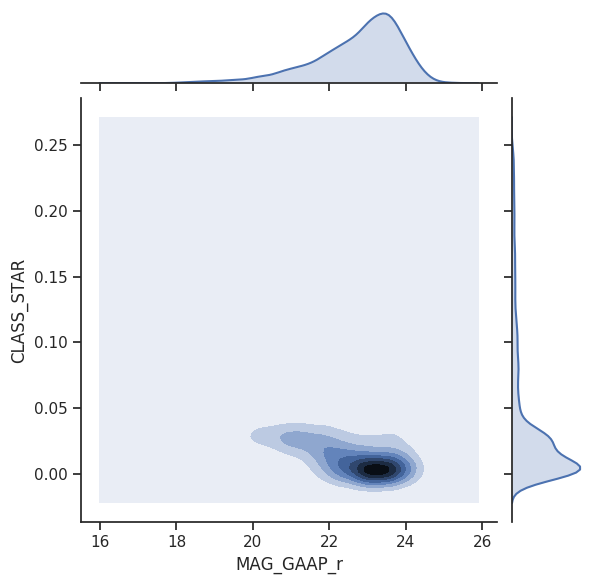

In [22]:
sns.jointplot(x='MAG_GAAP_r', y='CLASS_STAR', data=kids.loc[kids['CLASS_STAR'] < 0.25].sample(4000), kind='kde')

##  SEXtractor Flag

In [43]:
regex = '(MAG_GAAP_r|MAGERR_GAAP_r|Flag.+)'

In [24]:
kids_x_sdss.filter(regex=regex).describe()

,MAG_GAAP_r,MAGERR_GAAP_r,Flag_1,Flag_2,Flag_3,Flag_4,Flag_5,Flag_6,Flag_7,Flag_8
count,122964.000000,122964.000000,122964.000000,122964.000000,122964.0,122964.0,122964.000000,122964.0,122964.0,122964.0
mean,19.270208,0.005486,0.164853,0.422343,0.0,0.0,0.000854,0.0,0.0,0.0
std,1.573790,0.006267,0.371049,0.493935,0.0,0.0,0.029209,0.0,0.0,0.0
min,14.090182,0.000030,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
25%,17.937232,0.000964,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
50%,19.294328,0.002773,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
75%,20.738254,0.008810,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0
max,24.190691,0.136557,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0


In [44]:
kids_cs.filter(regex=regex).describe()

,MAG_GAAP_r,MAGERR_GAAP_r,Flag_1,Flag_2,Flag_3,Flag_4,Flag_5,Flag_6,Flag_7,Flag_8
count,149911.000000,149911.000000,149911.000000,149911.000000,149911.0,149911.0,149911.000000,149911.000000,149911.000000,149911.000000
mean,22.343960,0.054121,0.095317,0.185350,0.0,0.0,0.000053,0.000007,0.000007,0.000007
std,1.557202,0.044833,0.293653,0.388583,0.0,0.0,0.007305,0.002583,0.002583,0.002583
min,14.698381,0.000048,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,21.638430,0.017144,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,22.765362,0.045320,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,23.451499,0.081175,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
max,26.290426,0.900781,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [25]:
kids.filter(regex=regex).describe()

,MAG_GAAP_r,MAGERR_GAAP_r,Flag_1,Flag_2,Flag_3,Flag_4,Flag_5,Flag_6,Flag_7,Flag_8
count,226903.000000,226903.000000,226903.000000,226903.000000,226903.0,226903.0,226903.000000,226903.000000,226903.000000,226903.000000
mean,22.887629,0.085850,0.088113,0.160170,0.0,0.0,0.000040,0.000004,0.000004,0.000004
std,1.530509,0.070249,0.283459,0.366764,0.0,0.0,0.006298,0.002099,0.002099,0.002099
min,14.698381,0.000048,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,22.246992,0.028955,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,23.303761,0.072236,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,23.949010,0.127257,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
max,26.369030,1.052977,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [45]:
cols_of_interest = ['MAG_GAAP_r', 'MAGERR_GAAP_r', 'Flag_1', 'Flag_2']

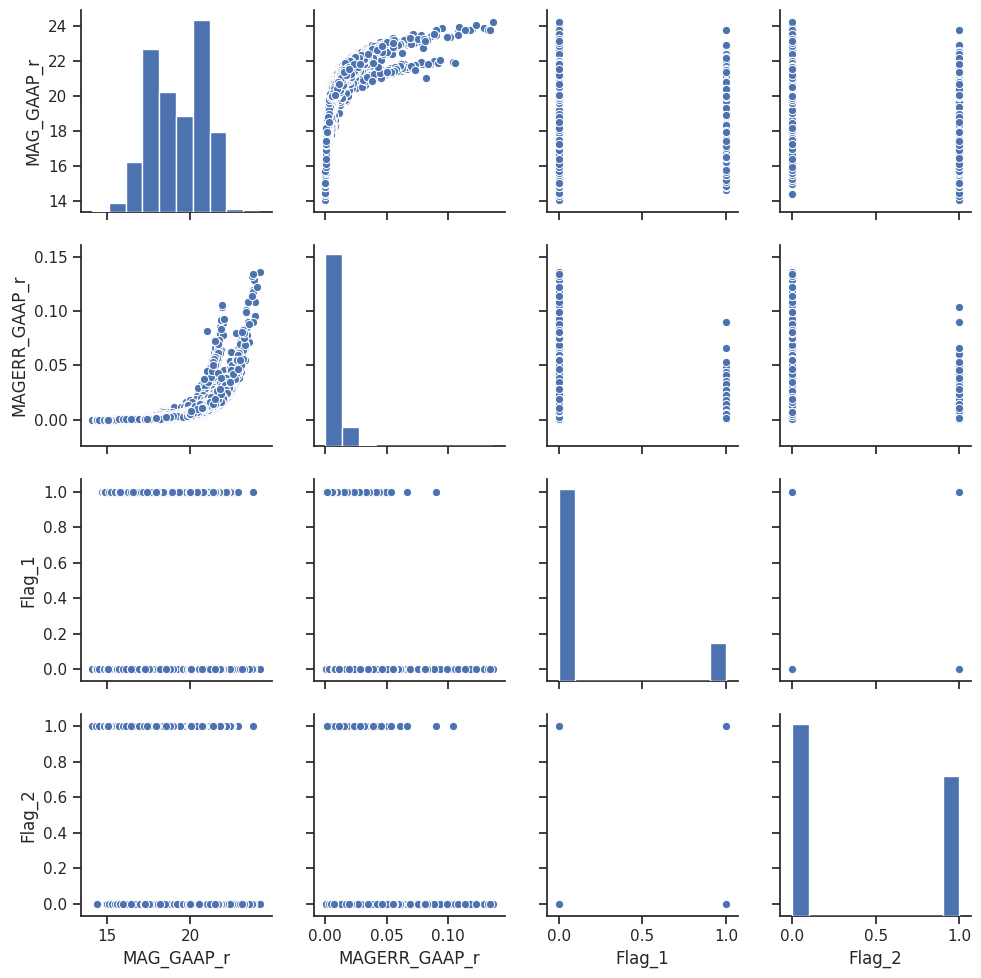

In [27]:
sns.pairplot(kids_x_sdss[cols_of_interest])

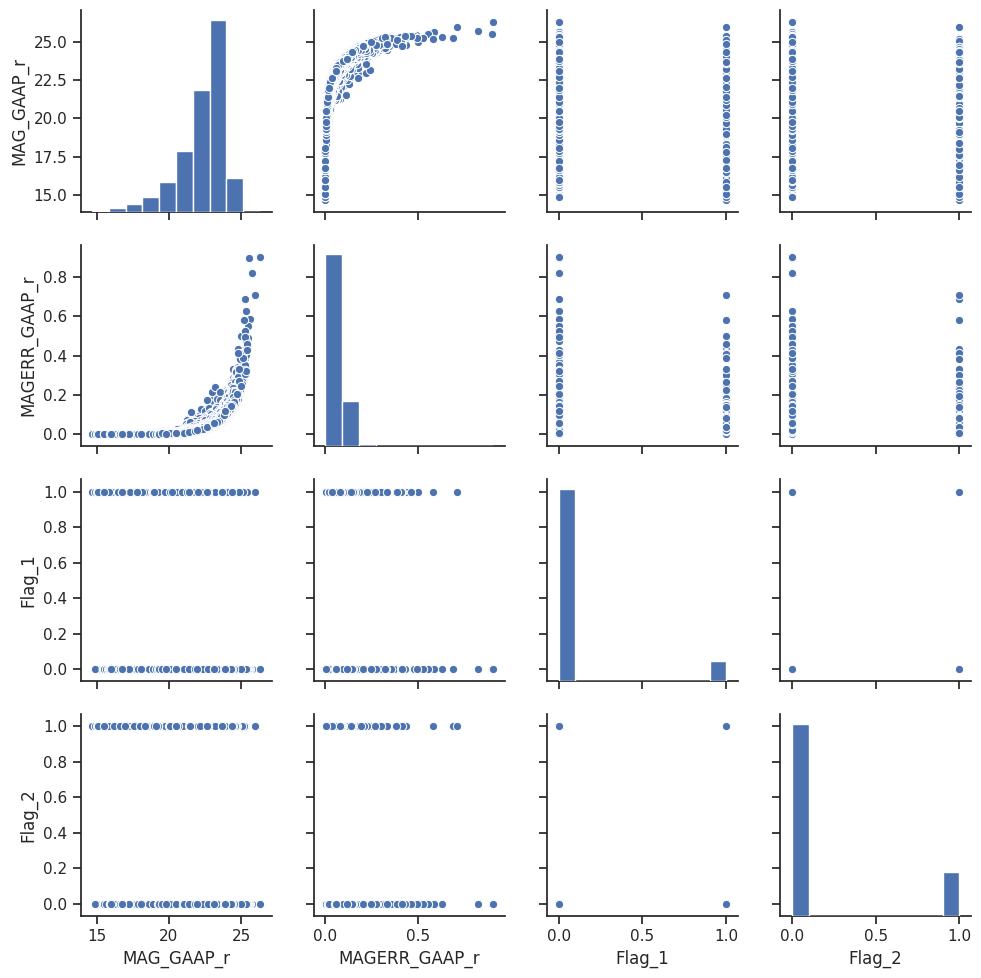

In [46]:
sns.pairplot(kids_cs[cols_of_interest])

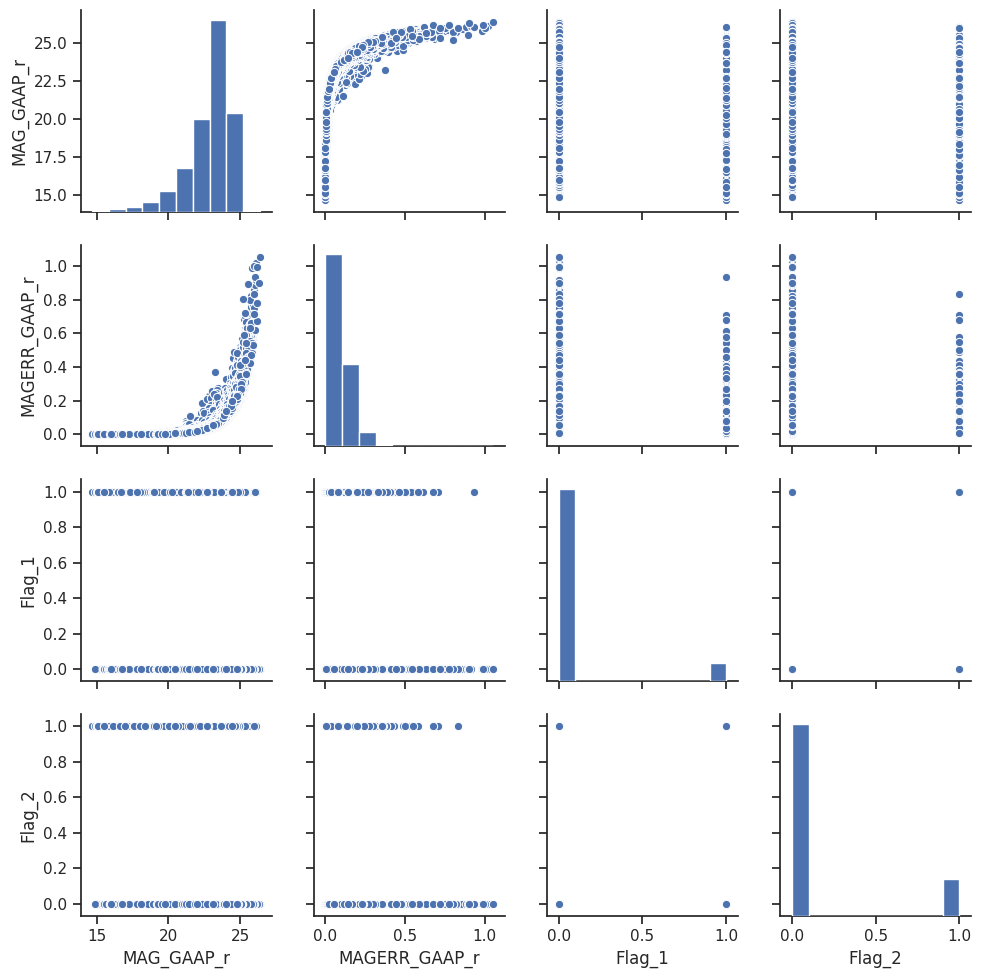

In [28]:
sns.pairplot(kids[cols_of_interest])

## IMAFLAGS_ISO

In [47]:
regex = '(MAG_GAAP_r|MAGERR_GAAP_r|IMAFLAGS_ISO.+)'

In [30]:
kids_x_sdss.filter(regex=regex).describe()

,MAG_GAAP_r,MAGERR_GAAP_r,IMAFLAGS_ISO_1,IMAFLAGS_ISO_2,IMAFLAGS_ISO_3,IMAFLAGS_ISO_4,IMAFLAGS_ISO_5,IMAFLAGS_ISO_6,IMAFLAGS_ISO_7
count,122964.000000,122964.000000,122964.000000,122964.0,122964.0,122964.0,122964.0,122964.0,122964.0
mean,19.270208,0.005486,0.003497,0.0,0.0,0.0,0.0,0.0,0.0
std,1.573790,0.006267,0.059032,0.0,0.0,0.0,0.0,0.0,0.0
min,14.090182,0.000030,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,17.937232,0.000964,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,19.294328,0.002773,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,20.738254,0.008810,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,24.190691,0.136557,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
kids_cs.filter(regex=regex).describe()

,MAG_GAAP_r,MAGERR_GAAP_r,IMAFLAGS_ISO_1,IMAFLAGS_ISO_2,IMAFLAGS_ISO_3,IMAFLAGS_ISO_4,IMAFLAGS_ISO_5,IMAFLAGS_ISO_6,IMAFLAGS_ISO_7
count,149911.000000,149911.000000,149911.000000,149911.0,149911.0,149911.0,149911.0,149911.0,149911.0
mean,22.343960,0.054121,0.000594,0.0,0.0,0.0,0.0,0.0,0.0
std,1.557202,0.044833,0.024359,0.0,0.0,0.0,0.0,0.0,0.0
min,14.698381,0.000048,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,21.638430,0.017144,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,22.765362,0.045320,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,23.451499,0.081175,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,26.290426,0.900781,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
kids.filter(regex=regex).describe()

,MAG_GAAP_r,MAGERR_GAAP_r,IMAFLAGS_ISO_1,IMAFLAGS_ISO_2,IMAFLAGS_ISO_3,IMAFLAGS_ISO_4,IMAFLAGS_ISO_5,IMAFLAGS_ISO_6,IMAFLAGS_ISO_7
count,226903.000000,226903.000000,226903.000000,226903.0,226903.0,226903.0,226903.0,226903.0,226903.0
mean,22.887629,0.085850,0.000511,0.0,0.0,0.0,0.0,0.0,0.0
std,1.530509,0.070249,0.022605,0.0,0.0,0.0,0.0,0.0,0.0
min,14.698381,0.000048,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,22.246992,0.028955,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,23.303761,0.072236,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,23.949010,0.127257,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,26.369030,1.052977,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
cols_of_interest = ['MAG_GAAP_r', 'MAGERR_GAAP_r', 'IMAFLAGS_ISO_1']

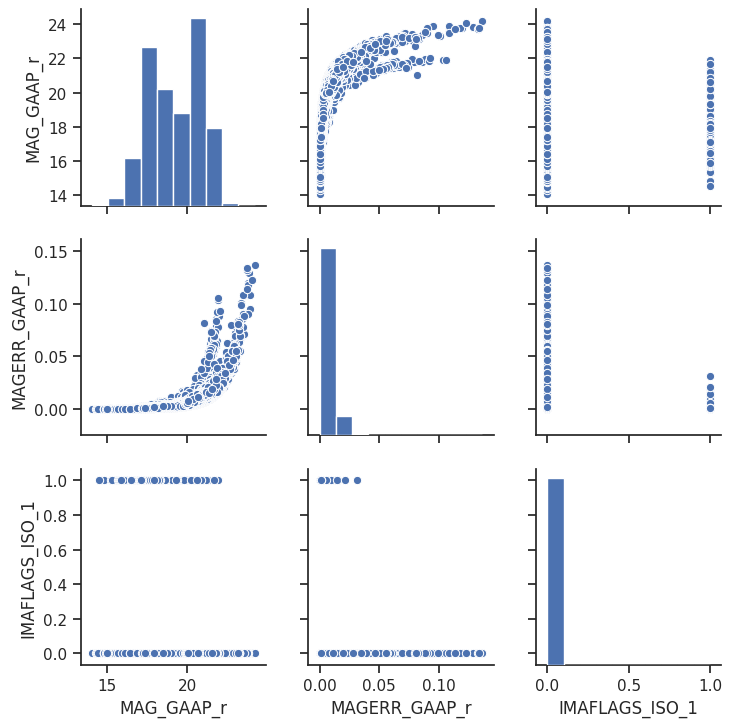

In [33]:
sns.pairplot(kids_x_sdss[cols_of_interest])

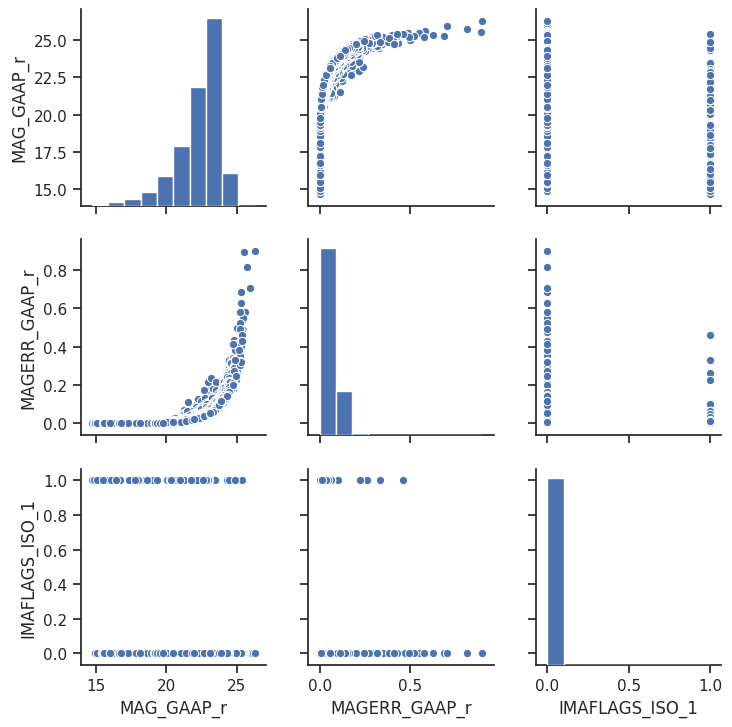

In [50]:
sns.pairplot(kids_cs[cols_of_interest])

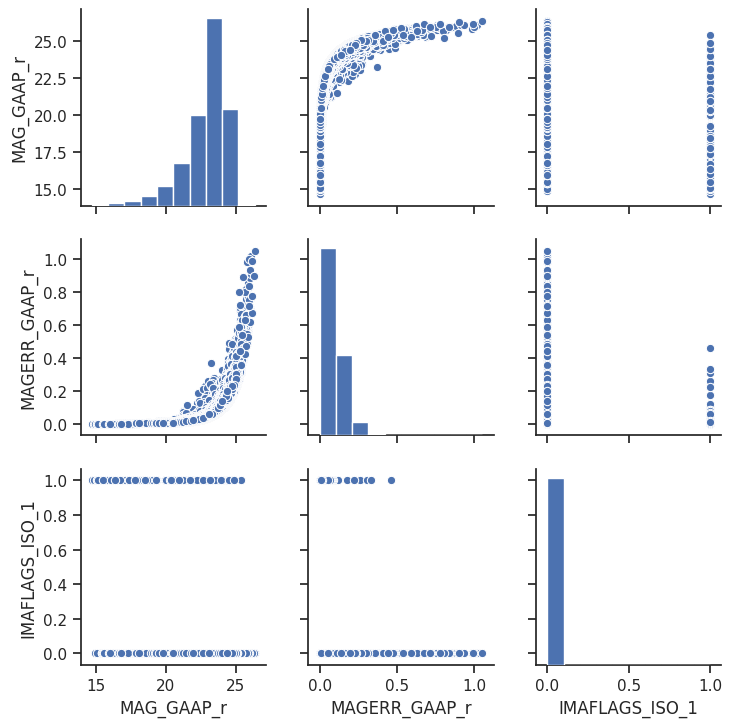

In [34]:
sns.pairplot(kids[cols_of_interest])

## MASK

In [51]:
regex = '(MAG_GAAP_r|MAGERR_GAAP_r|MASK.+)'
regex_class = '(CLASS|MAG_GAAP_r|MAGERR_GAAP_r|MASK.+)'

In [36]:
kids_x_sdss.filter(regex=regex).describe()

,MAG_GAAP_r,MAGERR_GAAP_r,MASK_1,MASK_2,MASK_3,MASK_4,MASK_5,MASK_6,MASK_7,MASK_8,MASK_9,MASK_10,MASK_11,MASK_12,MASK_13,MASK_14,MASK_15,MASK_16
count,122964.000000,122964.000000,122964.000000,122964.000000,122964.000000,122964.0,122964.000000,122964.000000,122964.000000,122964.000000,122964.000000,122964.000000,122964.000000,122964.000000,122964.000000,122964.000000,122964.0,122964.0
mean,19.270208,0.005486,0.000504,0.142863,0.077136,0.0,0.098012,0.006921,0.007035,0.007075,0.007075,0.007035,0.011678,0.060733,0.176702,0.096849,0.0,0.0
std,1.573790,0.006267,0.022449,0.349934,0.266809,0.0,0.297333,0.082903,0.083577,0.083817,0.083817,0.083577,0.107433,0.238841,0.381418,0.295754,0.0,0.0
min,14.090182,0.000030,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,17.937232,0.000964,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,19.294328,0.002773,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,20.738254,0.008810,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,24.190691,0.136557,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


In [52]:
kids_x_sdss.filter(regex=regex).describe()

,MAG_GAAP_r,MAGERR_GAAP_r,MASK_1,MASK_2,MASK_3,MASK_4,MASK_5,MASK_6,MASK_7,MASK_8,MASK_9,MASK_10,MASK_11,MASK_12,MASK_13,MASK_14,MASK_15,MASK_16
count,122964.000000,122964.000000,122964.000000,122964.000000,122964.000000,122964.0,122964.000000,122964.000000,122964.000000,122964.000000,122964.000000,122964.000000,122964.000000,122964.000000,122964.000000,122964.000000,122964.0,122964.0
mean,19.270208,0.005486,0.000504,0.142863,0.077136,0.0,0.098012,0.006921,0.007035,0.007075,0.007075,0.007035,0.011678,0.060733,0.176702,0.096849,0.0,0.0
std,1.573790,0.006267,0.022449,0.349934,0.266809,0.0,0.297333,0.082903,0.083577,0.083817,0.083817,0.083577,0.107433,0.238841,0.381418,0.295754,0.0,0.0
min,14.090182,0.000030,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,17.937232,0.000964,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,19.294328,0.002773,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,20.738254,0.008810,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,24.190691,0.136557,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


In [37]:
kids.filter(regex=regex).describe()

,MAG_GAAP_r,MAGERR_GAAP_r,MASK_1,MASK_2,MASK_3,MASK_4,MASK_5,MASK_6,MASK_7,MASK_8,MASK_9,MASK_10,MASK_11,MASK_12,MASK_13,MASK_14,MASK_15,MASK_16
count,226903.000000,226903.000000,226903.000000,226903.000000,226903.000000,226903.000000,226903.000000,226903.000000,226903.000000,226903.000000,226903.000000,226903.000000,226903.000000,226903.000000,226903.000000,226903.000000,226903.0,226903.0
mean,22.887629,0.085850,0.000167,0.138733,0.070074,0.001234,0.060330,0.004804,0.004843,0.004861,0.004883,0.004848,0.010793,0.054164,0.139452,0.082172,0.0,0.0
std,1.530509,0.070249,0.012940,0.345669,0.255272,0.035107,0.238097,0.069143,0.069427,0.069552,0.069709,0.069458,0.103328,0.226342,0.346418,0.274627,0.0,0.0
min,14.698381,0.000048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,22.246992,0.028955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,23.303761,0.072236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,23.949010,0.127257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,26.369030,1.052977,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


In [53]:
cols_of_interest = ['MAG_GAAP_r', 'MAGERR_GAAP_r', 'MASK_1', 'MASK_2', 'MASK_3', 'MASK_4', 'MASK_5']

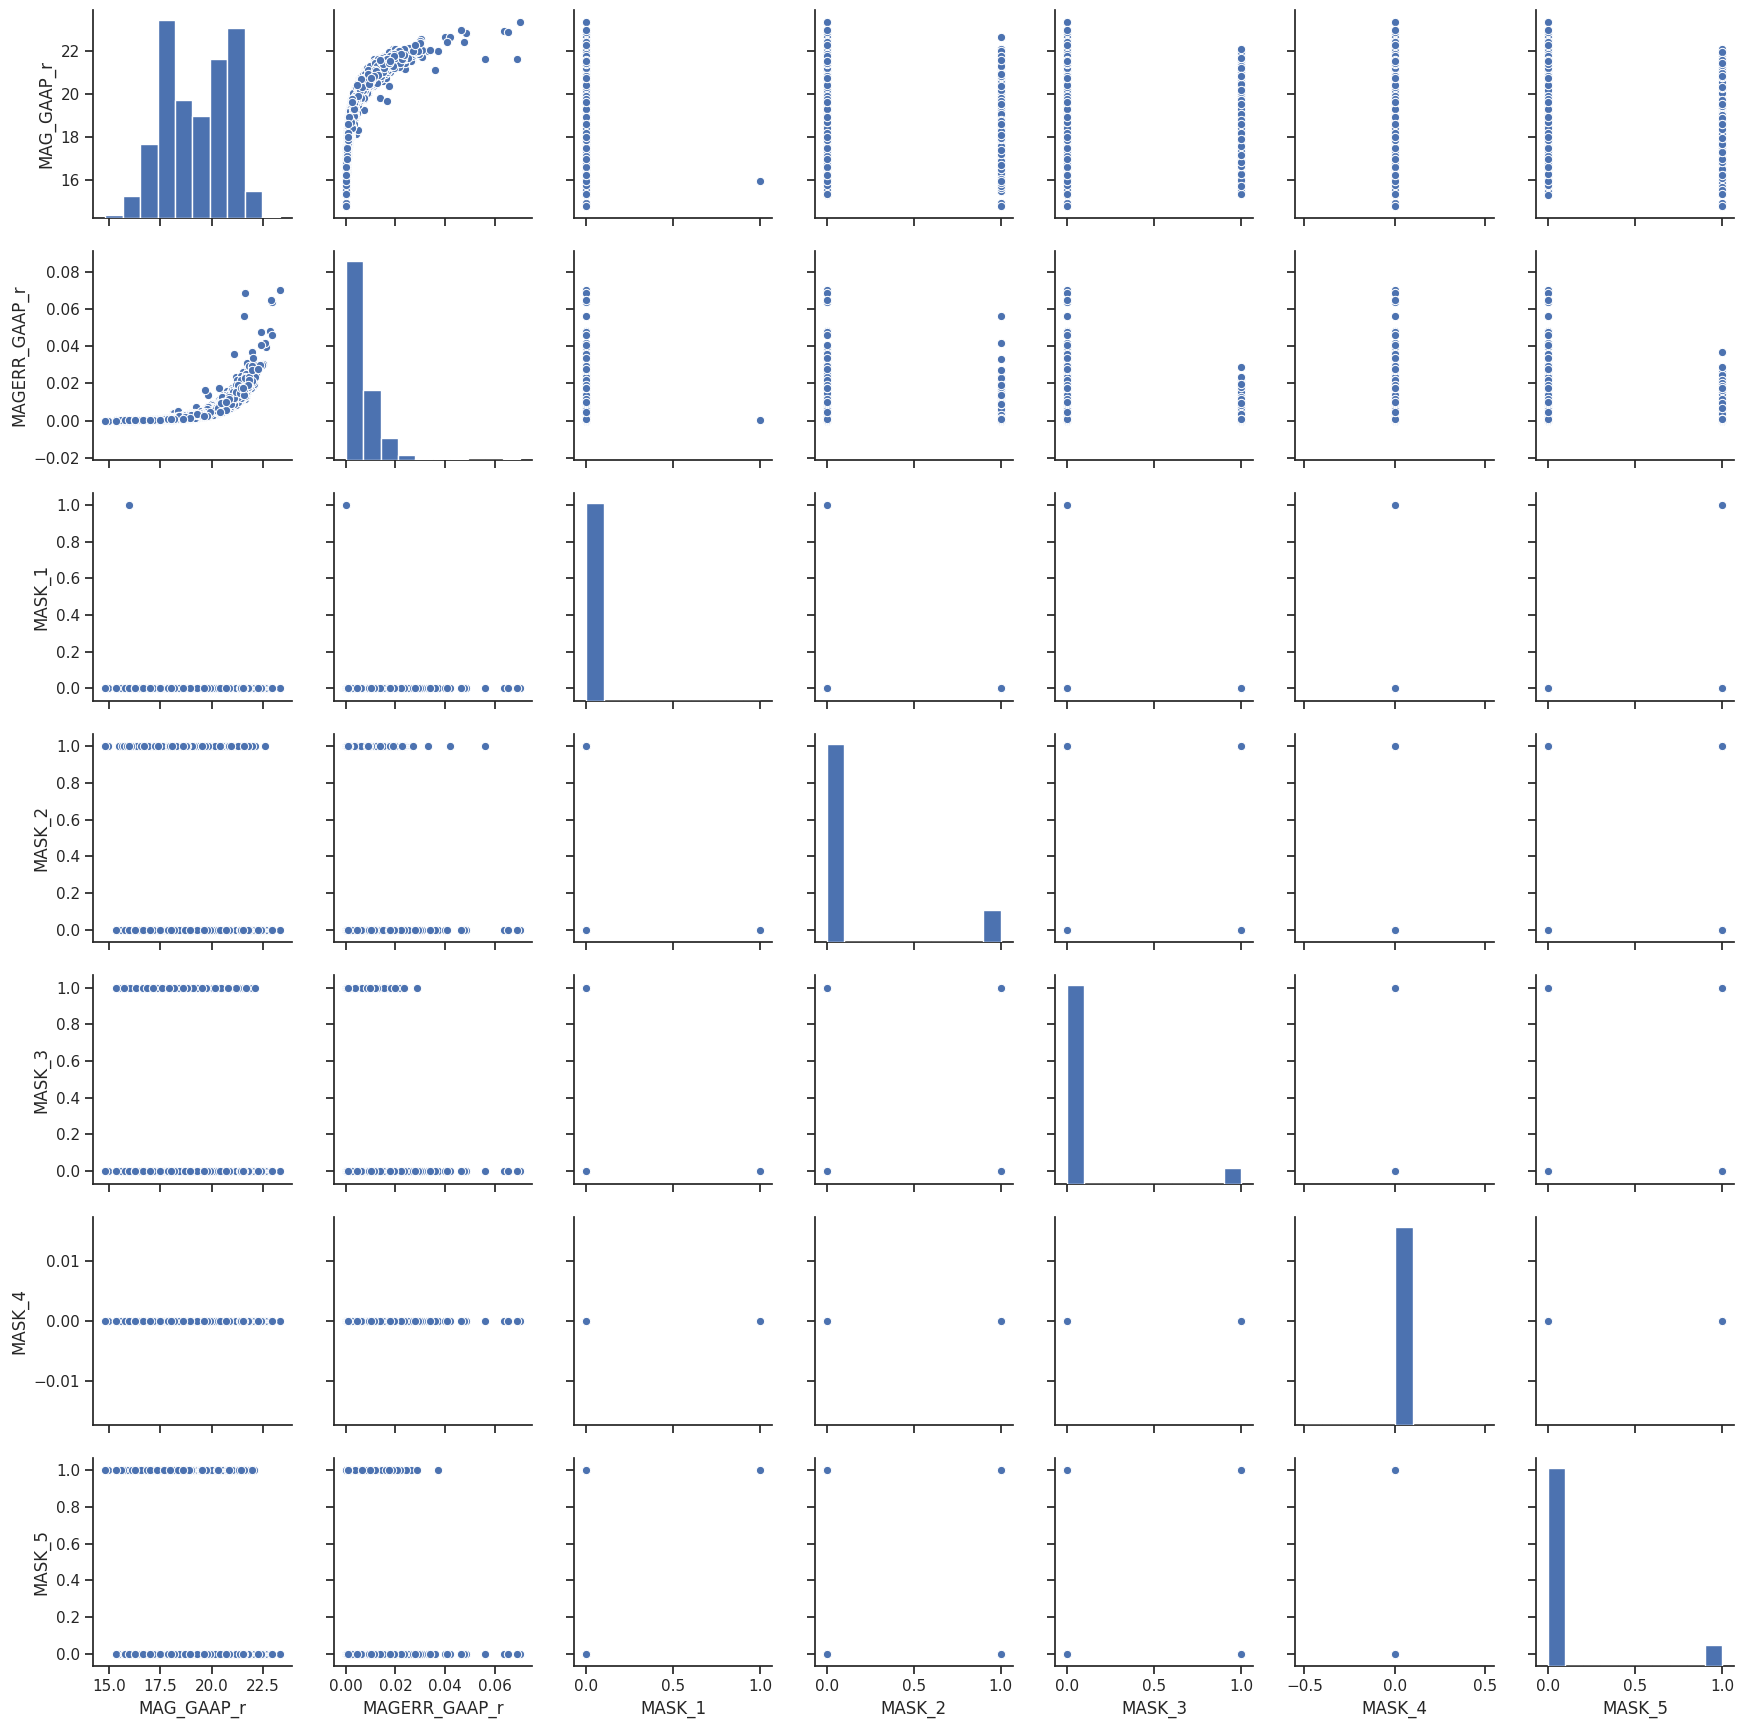

In [39]:
sns.pairplot(kids_x_sdss[cols_of_interest].sample(4000))

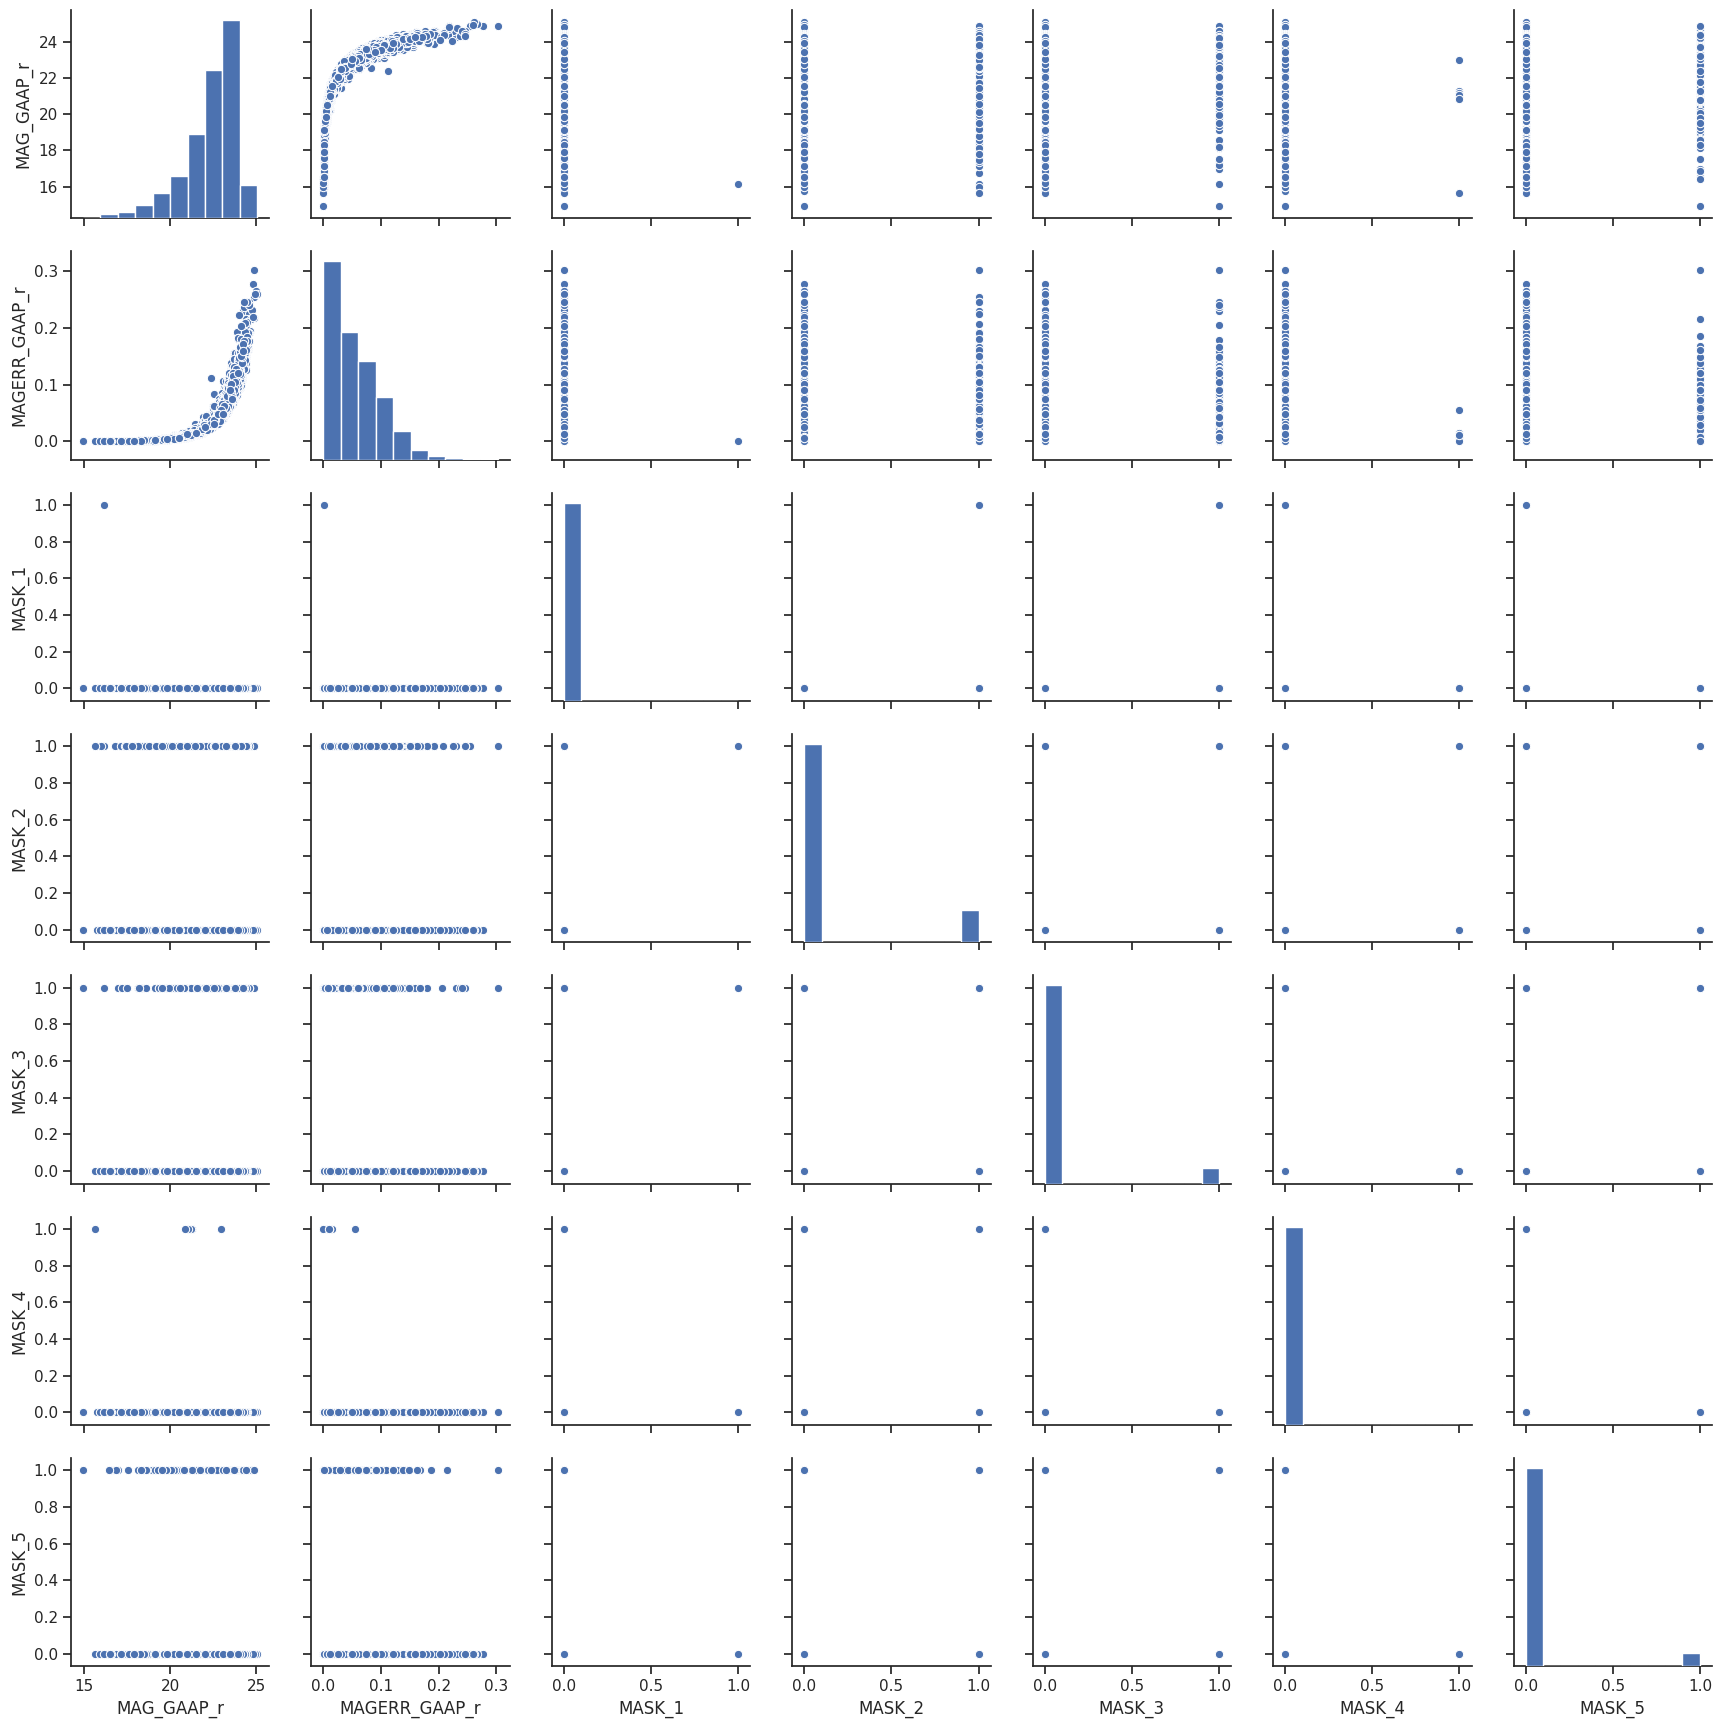

In [54]:
sns.pairplot(kids_cs[cols_of_interest].sample(4000))

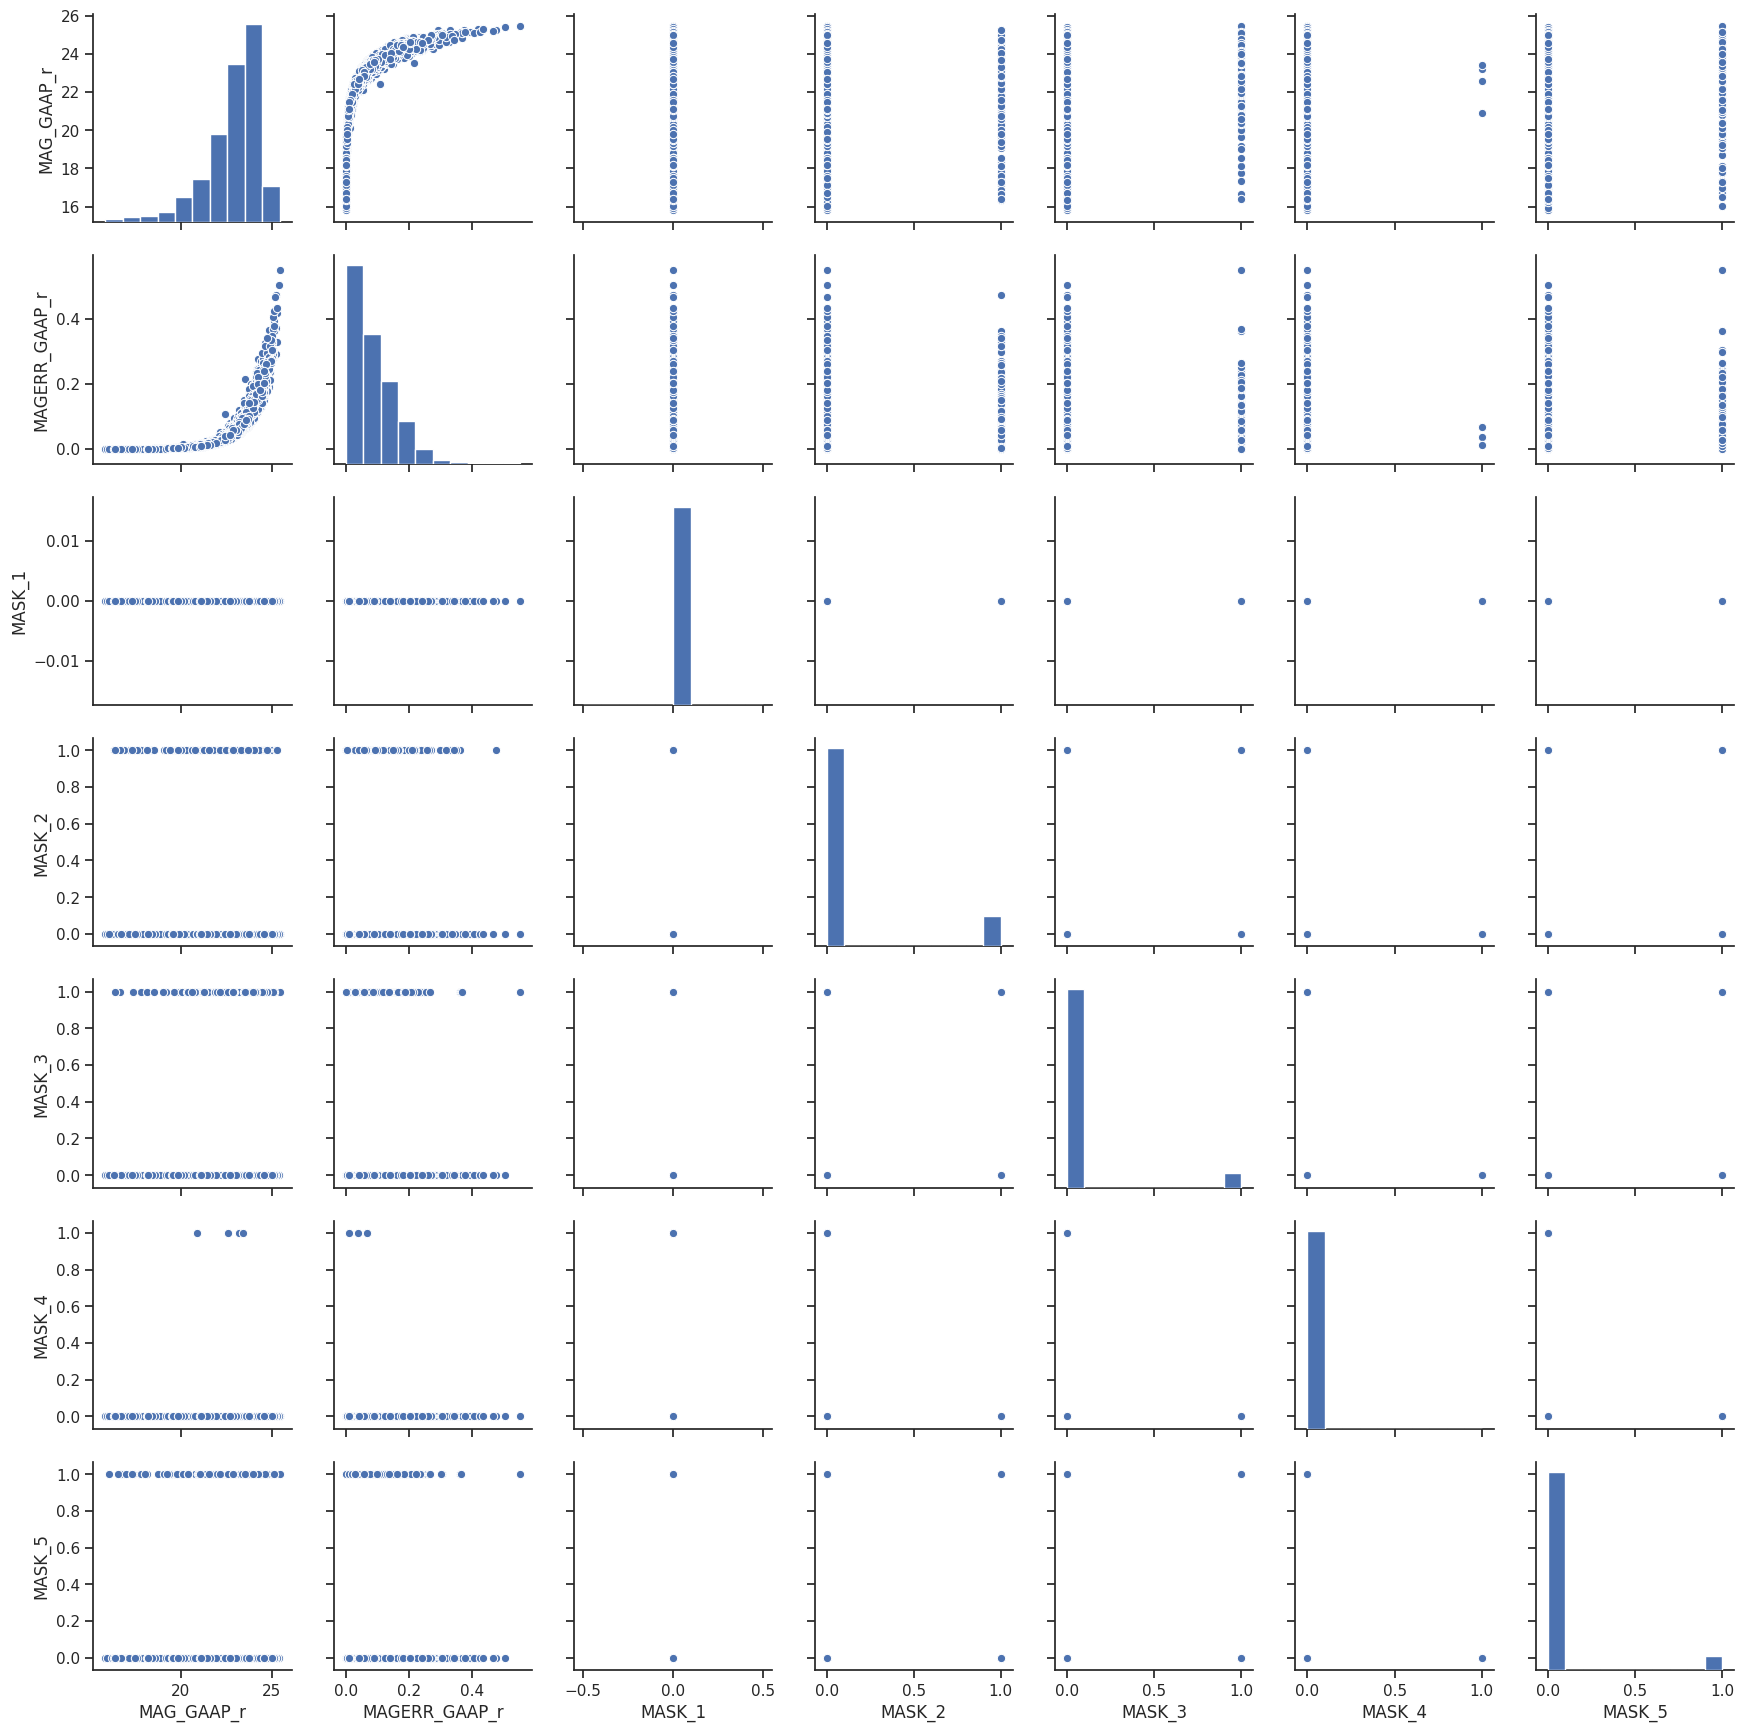

In [40]:
sns.pairplot(kids[cols_of_interest].sample(4000))

In [55]:
cols_of_interest = ['MAG_GAAP_r', 'MAGERR_GAAP_r', 'MASK_11', 'MASK_12', 'MASK_13', 'MASK_14']

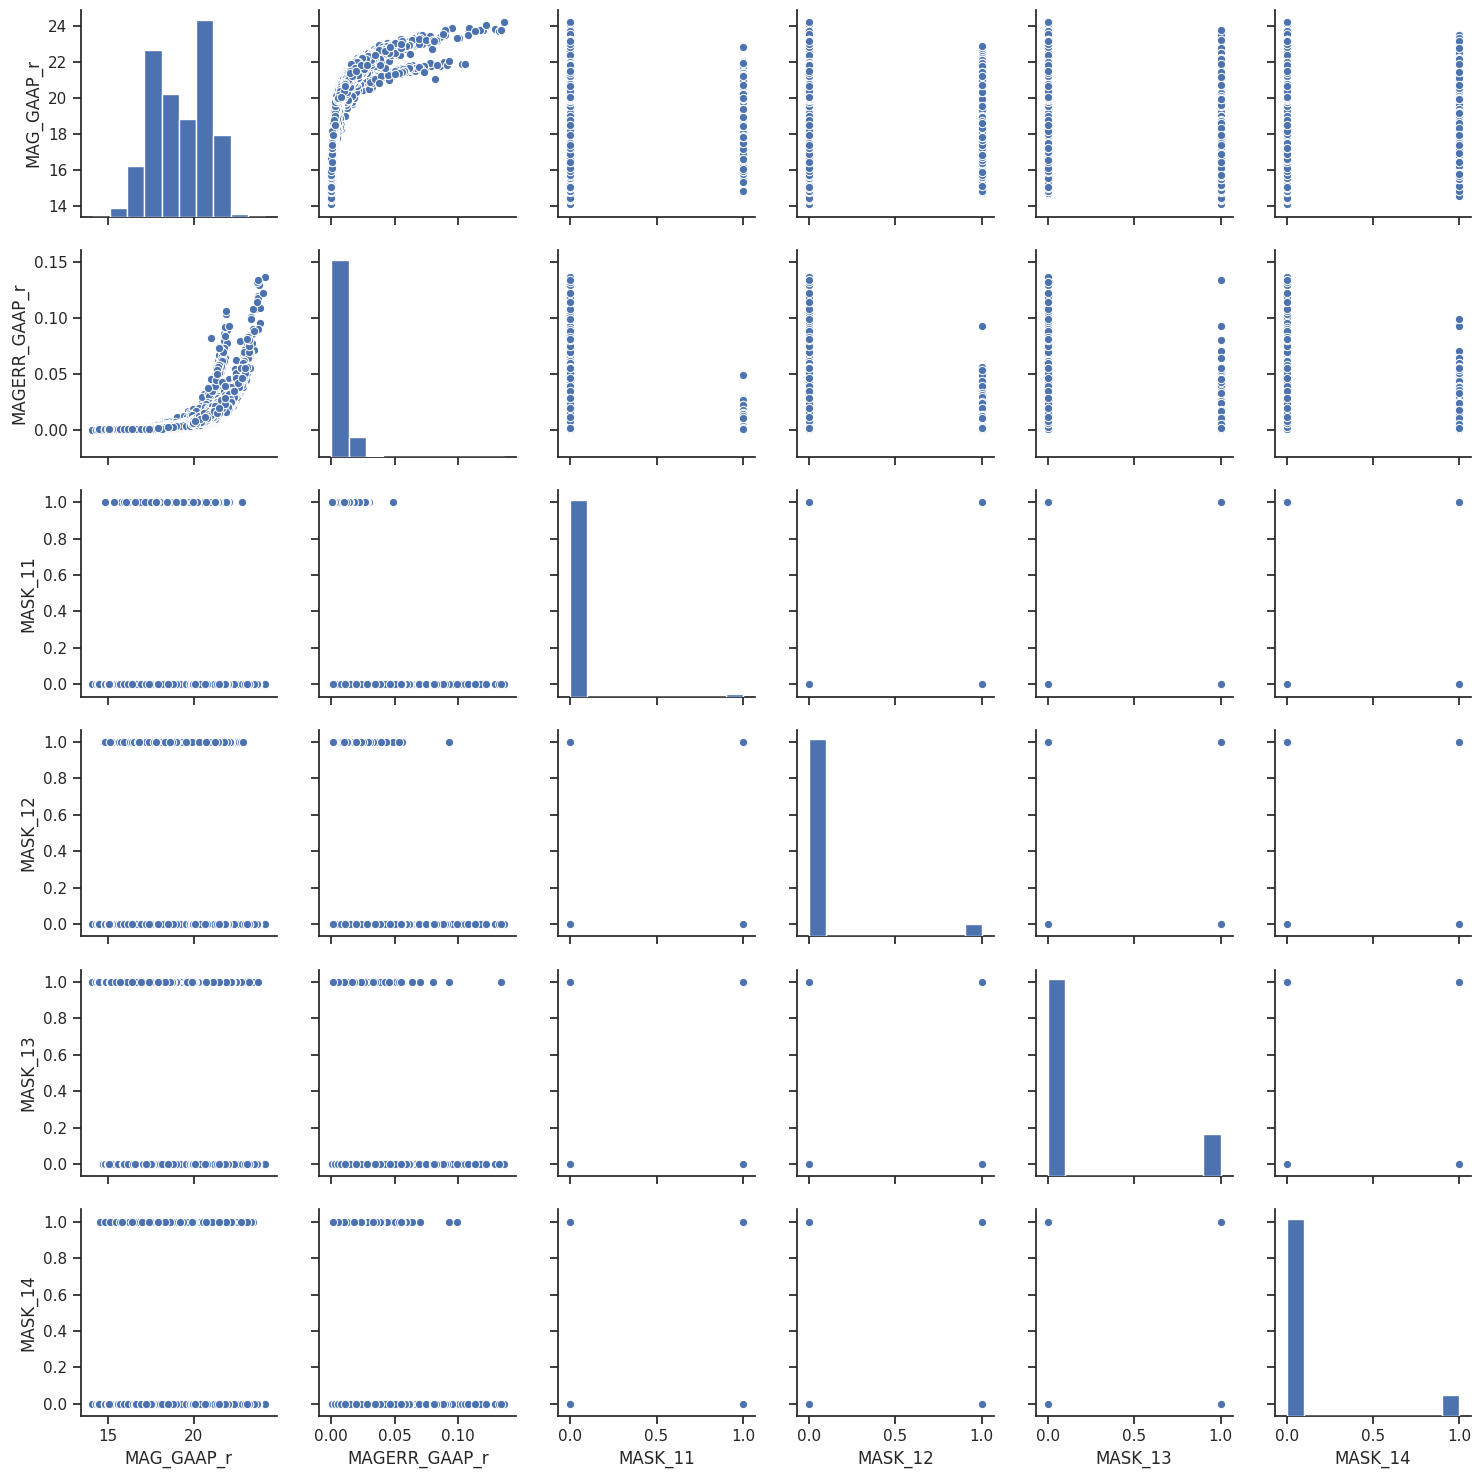

In [42]:
sns.pairplot(kids_x_sdss[cols_of_interest])

In [ ]:
sns.pairplot(kids_cs[cols_of_interest])

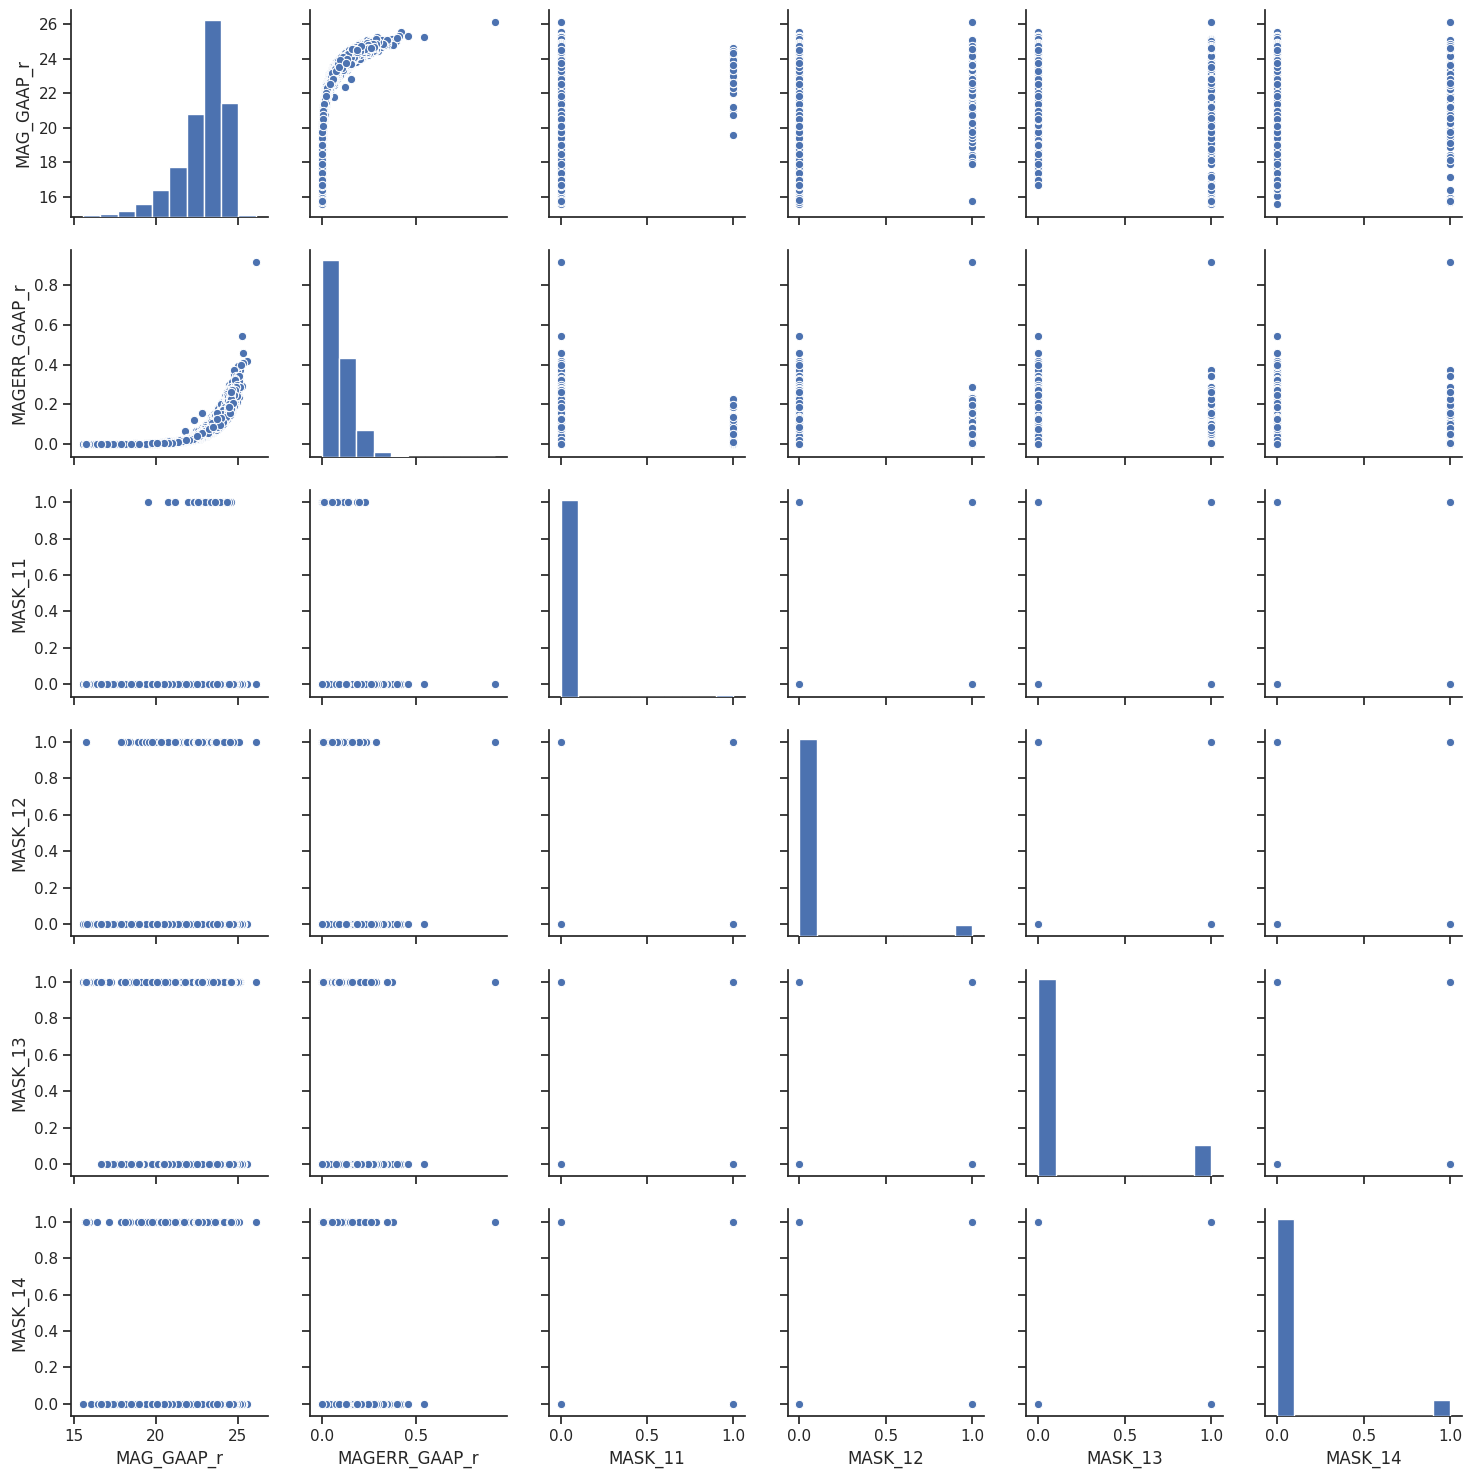

In [43]:
sns.pairplot(kids[cols_of_interest].sample(4000))

## Flag changes with magnitude

In [44]:
step = 0.5
df = pd.DataFrame(columns=['Flag_1', 'Flag_2', 'IMAFLAGS_ISO_1', 'MASK_2', 'MASK_13'])
for flag in df.columns:
    for max_mag in np.arange(20, 27, step):
        mean_val = kids.loc[(kids['MAG_GAAP_r'] < max_mag) & (kids['MAG_GAAP_r'] > max_mag - 1), flag].mean()
        df.loc['r {} - {}'.format(max_mag - step, max_mag), flag] = '{:.4f}'.format(mean_val)
display(df)

,Flag_1,Flag_2,IMAFLAGS_ISO_1,MASK_2,MASK_13
r 19.5 - 20.0,0.1197,0.2604,0.0013,0.1413,0.1453
r 20.0 - 20.5,0.1205,0.2486,0.0012,0.1417,0.1463
r 20.5 - 21.0,0.1161,0.2348,0.0010,0.1475,0.1489
r 21.0 - 21.5,0.1112,0.2193,0.0005,0.1424,0.1421
r 21.5 - 22.0,0.1090,0.2063,0.0006,0.1396,0.1369
r 22.0 - 22.5,0.1059,0.1943,0.0006,0.1394,0.1332
r 22.5 - 23.0,0.1045,0.1895,0.0005,0.1413,0.1351
r 23.0 - 23.5,0.1057,0.1847,0.0003,0.1420,0.1405
r 23.5 - 24.0,0.0972,0.1641,0.0001,0.1402,0.1398
r 24.0 - 24.5,0.0697,0.1166,0.0001,0.1357,0.1302


In [ ]:
# TODO: same table as above but for kids_x_sdss and kids_cs

In [45]:
# TODO: how SG2DPHOT changes when middle CLASS_STAR values are removed, is there still more 0 values?